Primeras filas del dataset:
   Generación del Sistema (kWh)  Consumo (kWh)  Índice de Rendimiento (%)  \
0                          1.31           1.64                      64.59   
1                          2.63           2.52                      51.54   
2                          2.72           2.94                      79.99   
3                          1.54           1.87                      72.28   
4                          0.20           0.46                      45.68   

   Precio de Venta (COP/kWh)  
0                        623  
1                        838  
2                        808  
3                        576  
4                        650  
Coeficiente de Determinación (R^2): -1.36


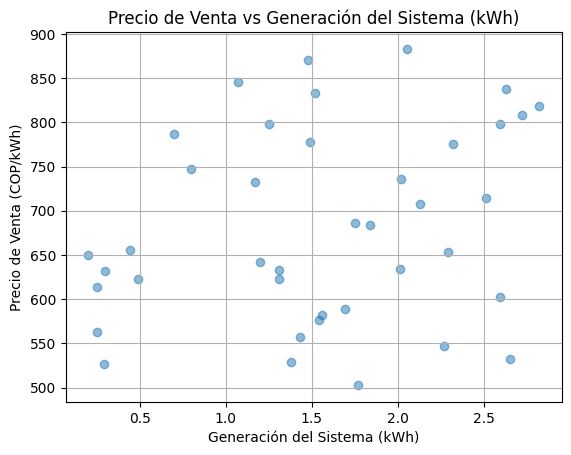

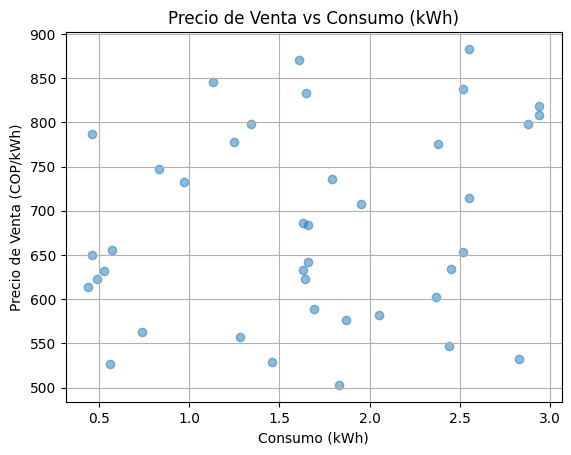

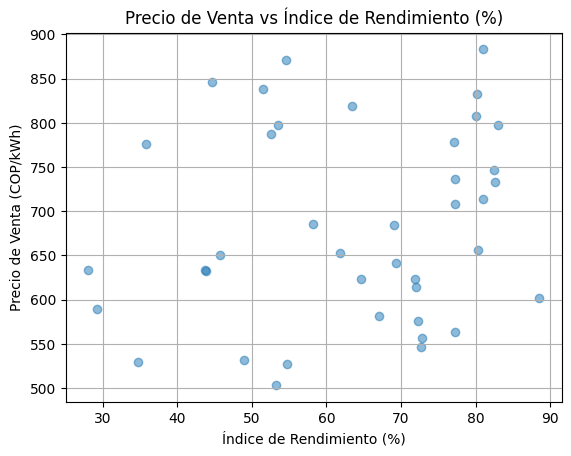

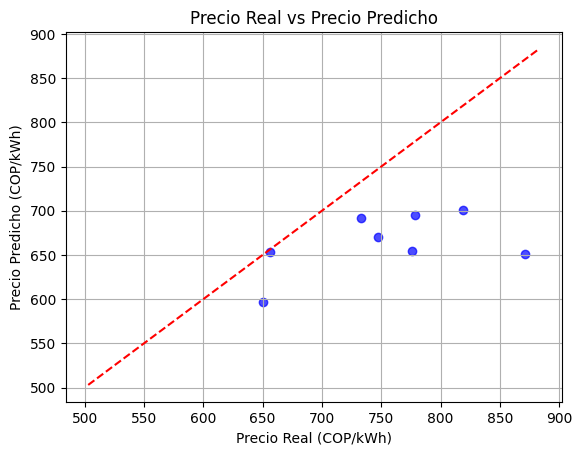

El modelo ha sido guardado como 'modelo_regresion_lineal.pkl'


In [1]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

# Cargar los datos
# Asegúrate de subir el archivo "data.xlsx" en Colab antes de ejecutar este script
data = pd.read_excel('data.xlsx')

# Mostrar las primeras filas para verificar los datos
print("Primeras filas del dataset:")
print(data.head())

# Separar variables independientes (X) y dependiente (y)
X = data[['Generación del Sistema (kWh)', 'Consumo (kWh)', 'Índice de Rendimiento (%)']]
y = data['Precio de Venta (COP/kWh)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo: Coeficiente de Determinación
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Gráficos de precio vs otras variables
for col in X.columns:
    plt.figure()
    plt.scatter(data[col], y, alpha=0.5)
    plt.title(f'Precio de Venta vs {col}')
    plt.xlabel(col)
    plt.ylabel('Precio de Venta (COP/kWh)')
    plt.grid(True)
    plt.show()

# Gráfico de precio predicho vs precio real
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.title('Precio Real vs Precio Predicho')
plt.xlabel('Precio Real (COP/kWh)')
plt.ylabel('Precio Predicho (COP/kWh)')
plt.grid(True)
plt.show()

# Guardar el modelo entrenado
with open('modelo_regresion_lineal.pkl', 'wb') as f:
    pickle.dump(model, f)

print("El modelo ha sido guardado como 'modelo_regresion_lineal.pkl'")
